# Linear Regression






### Least Squares for Linear Regression

The basic premise of linear regression is that we're trying to fit a linear model to our model to our data. For a dataset with $P$ features, this model is given by:

$y = Xθ+ϵ$

where:

* $y$ is a column vector of target values.
* $X$ is the matrix with each row as an example and each column as a feature (plus an additional column of ones for the bias term).
* $θ$ is the column vector of parameters we're trying to learn (including one bias term).
* $ϵ$ represents the error/residuals.

<br>To find the best $\theta$, we minimize the Least Square Cost Function

$L(\boldsymbol{\hat{\theta}}) = \frac{1}{N}\sum_{i=1}^{N}(\boldsymbol{\hat{\theta}}^T\mathbf{x_i}-y_i)^2$

where:

$\boldsymbol{\hat{\theta}}$  is the estimated coefficient vector

$N$ is the number of training sets

$\mathbf{x_i} $ is the feature vector for i-th training set.

$y_i$ is the label(target) for the i-th trainig set.


<br>The normal equation provides a closed-form solution to find the $\theta$ that minimizes $L(\boldsymbol{\hat{\theta}})$:

$\boldsymbol{\hat{\theta}} = \mathbf{(X^TX)^{-1}X^Ty} $

Once we have $\hat{\theta}$, we can make predictions for new data $X_{new}$:

$y_{pred} = X_{new} \theta$.

<br>You are provided below a class template called `MyLeastSquares` to implement the least squares class. In this part, you will complete the `fit` function and the `predict` function within the class below.

<br>Now it is time to run the cell after you complete the above steps to **train** and **predict** your **Linear** regressor on the `diabetes` dataset. *Hint: The expected training and test errors are in the range $1000$ to $5000$.*





In [14]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class MyLeastSquares:
    def __init__(self, X_train, y_train):
        """Function stores feature matrix and corresponding target data.

        Parameters:
        -----------
        X_train: array_like, shape(N,P)
            ndarray containing N training examples, each with P feature values.

        y_train: array_like, shape(N,1)
            ndarray containing target values for each of N examples in X_train."""

        self.X_train = X_train
        self.y_train = y_train

        self.N = self.X_train.shape[0] #number of training samples
        self.P = self.X_train.shape[1] #number of features for each training sample

        self.X = np.concatenate((np.ones((self.X_train.shape[0], 1)),self.X_train), axis=1) #add columns of ones to the first row of X_train for the bias.

    def fit(self):
        """Function computes the predicted theta of shape (P+1, 1) for regression. This is the closed-form solution to the theta that minimizes L."""
        X_trans = np.transpose(self.X)

        self.theta = np.dot(np.linalg.inv(np.dot(X_trans, self.X)), np.dot(X_trans, self.y_train))  #θ=(XTX)−1 * XTy


    def predict(self, X_test):
        """Function predicts targets for given X_test.

        Parameters:
        -----------
        X_test: array_like, shape(N,P)
            ndarray containing N test examples with P features each.

        Returns: array_like, shape(N,1).
            ndarray containing predicted targets of shape (N,1).
        """
        X_test_ = np.concatenate((np.ones((X_test.shape[0], 1)),X_test), axis=1)
        y_pred = np.dot(X_test_, self.theta)

        return y_pred

# load dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# train-test split
n_train = 40
n_test = X.shape[0] - n_train

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=n_train, test_size=n_test, random_state=4803)

# train theta
LS = MyLeastSquares(X_train, y_train)
LS.fit()

# test
y_pred = LS.predict(X_test)

# evaluate performance
print('MSE on Training Data: {:0.3f}'.format(np.sum((LS.predict(X_train) - y_train)**2)/y_train.size))
print('MSE on Test Data: {:0.3f}'.format(np.sum((y_pred - y_test)**2)/y_pred.size))


MSE on Training Data: 3203.373
MSE on Test Data: 3282.586


<br> In this part, you will vary the size of the training dataset from $20$ to $200$, and compute the MSE on the training data and the MSE in the testing data. Plot the two curves on the same plot, where the x-axis is the size of the trainign dataset and the y-axis is MSE.

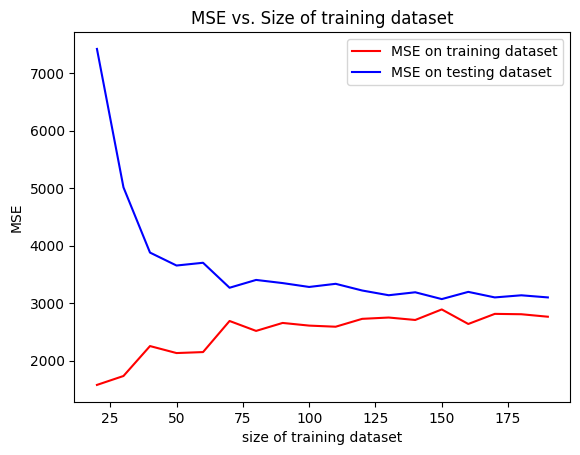

In [15]:

n_train = np.arange(20,200,10) #define different size of training dataset
n_test = X.shape[0] - n_train
MSE_train = np.zeros(n_train.shape[0])
MSE_test = np.zeros(n_train.shape[0])

for i in range(n_train.shape[0]):
    #for each number of training sets, repeat 10 times and average the result
    MSE_avg_train = 0
    MSE_avg_test = 0
    for j in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=n_train[i], test_size=n_test[i], random_state=None)
        LS = MyLeastSquares(X_train, y_train)
        LS.fit()
        y_pred = LS.predict(X_test)
        MSE_avg_train = MSE_avg_train + np.sum((LS.predict(X_train) - y_train)**2)/y_train.size
        MSE_avg_test = MSE_avg_test + np.sum((y_pred - y_test)**2)/y_pred.size

    MSE_avg_train = 1/10 * MSE_avg_train
    MSE_avg_test = 1/10 * MSE_avg_test
    MSE_train[i] = MSE_avg_train
    MSE_test[i] = MSE_avg_test
plt.plot(n_train,MSE_train,'r', n_train,MSE_test,'b')
plt.legend(["MSE on training dataset","MSE on testing dataset"])
plt.title("MSE vs. Size of training dataset")
plt.xlabel("size of training dataset")
plt.ylabel("MSE")
plt.show()
